In [1]:
from __future__ import print_function
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import tensorflow as tf
#import keras as kr
import sklearn as skl
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D, MaxPooling1D, Activation
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from keras import regularizers
from keras.models import load_model
from sklearn import preprocessing
import os
import feather

Using TensorFlow backend.


In [2]:
#y_validate=pd.read_pickle("CZI.PBMC.y.validate.nn.pkl")
#y_test=pd.read_pickle("CZI.PBMC.y.test.nn.pkl")
#X=pd.read_pickle("CZI.PBMC.full.X.nn.sorted.cleaned.pkl")
#y_train=pd.read_pickle("CZI.PBMC.y.tra")
y_train=pd.read_feather('CZI.PBMC.y.train.nn.feather').values
X_train=pd.read_feather('CZI.PBMC.X.train.nn.feather')
#X_train=pd.read_feather('CZI.PBMC.X.train.nn.notnorm.feather')


y_validate=pd.read_feather('CZI.PBMC.y.validate.nn.feather').values
X_validate=pd.read_feather('CZI.PBMC.X.validate.nn.feather')
#X_validate=pd.read_feather('CZI.PBMC.X.validate.nn.notnorm.feather')


N_train_dat=X_train.shape[0]
#N_test_dat=
N_val_dat=X_validate.shape[0]
N_feat=X_validate.shape[1]

X_train=X_train.values#.reshape(N_train_dat,N_feat,1)
X_validate=X_validate.values#.reshape(N_val_dat,N_feat,1)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_validate_minmax = min_max_scaler.fit_transform(X_validate)


#input_dir = os.getcwd()
#genes=pd.read_csv("genes.nn.csv").x[1:]

#counts_matrix={}
#for i in range(1,11,2):
#    brcds_1=pd.read_csv(input_dir+'/CZI.PBMC.'+str(i)+'.brcds').x
#    counts_matrix_1=scipy.io.mmread(input_dir + '/CZI.PBMC.'+str(i)+'.umis.mtx').T.tocsc()
#    brcds_2=pd.read_csv(input_dir+'/CZI.PBMC.'+str(i+1)+'.brcds').x
#    counts_matrix_2=scipy.io.mmread(input_dir + '/CZI.PBMC.'+str(i+1)+'.umis.mtx').T.tocsc()
#    df_1=pd.DataFrame(counts_matrix_1.todense(),index=brcds_1,columns=genes)
 #   df_2=pd.DataFrame(counts_matrix_2.todense(),index=brcds_2,columns=genes)
#    if i==1:
#        czi_pbmc=pd.concat([df_1,df_2])
#    else:
#        czi_pbmc=pd.concat([czi_pbmc,df_1,df_2])
#        
#        
#czi_pbmc.to_pickle("CZI.PBMC.full.nn.pkl")




#df_x_train = pd.read_csv("/projects/ucar-lab/danaco/bncmrk-dblts/DF/input/CZI.PBMC/CZI.PBMC.2.train.csv", header=None)
#df_x_validate = pd.read_csv("/projects/ucar-lab/danaco/bncmrk-dblts/DF/input/CZI.PBMC/CZI.PBMC.2.validate.csv", header=None)
#df_x_test = pd.read_csv("/projects/ucar-lab/danaco/bncmrk-dblts/DF/input/CZI.PBMC/CZI.PBMC.2.test.csv", header=None)



In [ ]:
#np.sum(y_train==0)/len(y_train)

#X_train.shape

#a=np.arange(0,len(y))
#np.random.shuffle(a)

#train_locs, validate_locs, test_locs = np.split(a, [int(.8 * len(a)), int(.9 * len(a))])
#all_brcds=pd.DataFrame(y.index.values,columns=np.array(["Barcode"]))
#validate_brcds=pd.DataFrame(y_validate.index.values,columns=np.array(["Barcode"]))
#test_brcds=pd.DataFrame(pd.read_pickle("CZI.PBMC.test.barcodes.pkl").x.values,columns=np.array(["Barcode"]))
#val_tst_brcds=pd.concat([validate_brcds,test_brcds])

#np.concatenate([validate_brcds,test_brcds])
    #np.concatenate(validate_brcds,test_brcds)#pd.concat([validate_brcds,test_brcds])
#type(test_brcds)
#type(validate_brcds)

#dir()


In [ ]:
#train_locs=np.array([np.where(~all_brcds.Barcode.isin(val_tst_brcds.Barcode).values)])[0,0,:]
#all_brcds.shape
#not True
#train_brcds=all_brcds.iloc[train_locs,]
#pd.DataFrame(train_brcds.Barcode.values).to_pickle("CZI.PBMC.train.barcodes.pkl")
os.listdir()

In [ ]:
#bebe=pd.read_pickle("CZI.PBMC.new.train.locs.pkl")

#pd.DataFrame(train_locs,columns=np.array(["Locs"])).to_pickle("CZI.PBMC.new.train.locs.pkl")
#pd.DataFrame(y.index.values[train_locs],columns=np.array(["Barcode"])).to_pickle("CZI.PBMC.new.train.barcodes.pkl")

#pd.DataFrame(validate_locs,columns=np.array(["Locs"])).to_pickle("CZI.PBMC.new.validate.locs.pkl")
#pd.DataFrame(y.index.values[validate_locs],columns=np.array(["Barcode"])).to_pickle("CZI.PBMC.new.validate.barcodes.pkl")

#pd.DataFrame(test_locs,columns=np.array(["Locs"])).to_pickle("CZI.PBMC.new.test.locs.pkl")
#pd.DataFrame(y.index.values[test_locs],columns=np.array(["Barcode"])).to_pickle("CZI.PBMC.new.test.barcodes.pkl")
X_validate_minmax.min()

In [14]:
#from keras.models import load_model

#dnn_autoencoder.save('dnn_autoencoder_clr.h5')
dnn_autoencoder=dnn_autoencoder_notnorm
#dnn_autoencoder_notnorm=load_model('dnn_autoencoder_notnorm.h5')

In [7]:
# The known number of output classes.
#num_classes = 2

# Input image dimensions
#input_shape = (18488,)


dnn_autoencoder = Sequential()
#model.add(Conv1D(filters=1, kernel_size=10,strides=10, input_shape=(N_feat,1), padding='same',activation='relu',kernel_initializer="uniform"))
#model.add(Dropout(0.2))
#dnn_autoencoder.add(Dropout(0.2,input_shape=(N_feat,)))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
dnn_autoencoder.add(Dense(N_feat,input_dim=N_feat ,use_bias=False, kernel_constraint=maxnorm(3)))
dnn_autoencoder.add(BatchNormalization())
dnn_autoencoder.add(Activation('relu'))
#model.add(Dense(8192, activation='relu'))
#model.add(Dense(4096, activation='relu'))
#model.add(Dense(2048, activation='relu'))
dnn_autoencoder.add(Dense(1024, activation='relu',kernel_constraint=maxnorm(3)))
dnn_autoencoder.add(Dropout(0.2))

#model.add(Dense(512, activation='relu'))
#dnn_autoencoder.add(Dropout(0.5))
dnn_autoencoder.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))
dnn_autoencoder.add(Dense(256, activation='relu',kernel_constraint=maxnorm(3)))
#model.add(Dense(num_classes, activation='softmax'))
#dnn_autoencoder.add(Dense(128, activation='relu',kernel_constraint=maxnorm(3)))
#dnn_autoencoder.add(Dense(64, activation='relu'
                  #        ,activity_regularizer=regularizers.l1(10e-6),kernel_constraint=maxnorm(3)))
#dnn_autoencoder.add(Dense(256, activation='relu'))

#dnn_autoencoder.add(Dense(128, activation='relu',kernel_constraint=maxnorm(3)))
#dnn_autoencoder.add(Dense(256, activation='relu',kernel_constraint=maxnorm(3)))

dnn_autoencoder.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))

dnn_autoencoder.add(Dense(1024, activation='relu',kernel_constraint=maxnorm(3)))
#model.add(Dense(2048, activation='relu'))


dnn_autoencoder.add(Dense(N_feat, activation='sigmoid'))

dnn_autoencoder.compile(loss=keras.losses.binary_crossentropy, #mean_squared_error
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

dnn_autoencoder.summary()

#encoder_layer1 = dnn_autoencoder.layers[0]
#encoder_layer2 = dnn_autoencoder.layers[1]
#encoder_layer3 = dnn_autoencoder.layers[2]
#encoder_layer4 = dnn_autoencoder.layers[3]
#encoder_layer5 = dnn_autoencoder.layers[4]
#dnn_encoder = Model(input_img, encoder_layer5(encoder_layer4(encoder_layer3(encoder_layer2(encoder_layer1(input_img))))))

#encoder.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 18488)             341806144 
_________________________________________________________________
batch_normalization_3 (Batch (None, 18488)             73952     
_________________________________________________________________
activation_3 (Activation)    (None, 18488)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              18932736  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
__________

In [8]:
batch_size = 256
epochs = 10
dnn_autoencoder.fit(X_train_minmax, X_train_minmax,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_validate_minmax, X_validate_minmax))

Train on 242744 samples, validate on 30343 samples
Epoch 1/10
242744/242744 [==============================] - 4348s 18ms/step - loss: 0.0476 - acc: 0.9617 - val_loss: 0.0483 - val_acc: 0.9623
Epoch 2/10
242744/242744 [==============================] - 4413s 18ms/step - loss: 0.0443 - acc: 0.9624 - val_loss: 0.0465 - val_acc: 0.9623
Epoch 3/10
242744/242744 [==============================] - 4300s 18ms/step - loss: 0.0440 - acc: 0.9624 - val_loss: 0.0464 - val_acc: 0.9623
Epoch 4/10
 81152/242744 [=========>....................] - ETA: 41:01 - loss: 0.0438 - acc: 0.9625

KeyboardInterrupt: 

In [4]:

df1_train=pd.DataFrame(X_train_minmax)
df1_validate=pd.DataFrame(X_validate_minmax)


In [10]:
#X_validate_minmax_pred=np.array(dnn_autoencoder_notnorm.predict(X_validate_minmax))
X_validate_minmax_pred=np.array(dnn_autoencoder.predict(X_validate_minmax))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ab00ce52080>]],
      dtype=object)

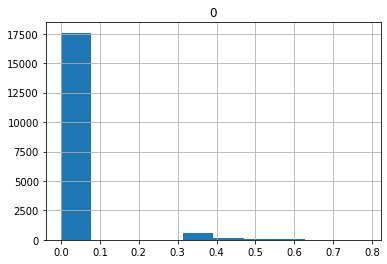

In [12]:
pd.DataFrame(X_validate_minmax[10,]).hist()

In [ ]:
X_train_minmax_pred=np.array(X_train_minmax_pred)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ab00ccb61d0>]],
      dtype=object)

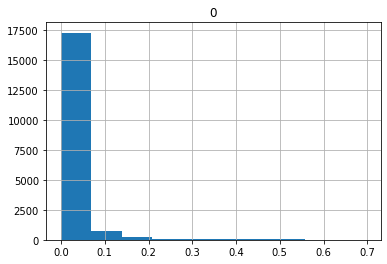

In [11]:
pd.DataFrame(X_validate_minmax_pred[10,]).hist()

In [5]:
#X=scipy.io.mmread('czi_pbmc_notnorm.mtx').todense()
X=scipy.io.mmread('CZI.PBMC.1.umis.mtx').todense()

numpy.matrix